<a href="https://colab.research.google.com/github/onsoon829/dataproject/blob/master/606_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%ED%9A%8C%EA%B7%80%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
#################
## 난수 발생##########

#0부터 1사이의 균일 분포
data = np.random.rand(10)  # rand: 0이상 1미만의 임의의 난수 반환
print(data)

#가우시안 표준 정규분포(평균:0, 표준편차:1)
data = np.random.randn(10)
print(data)

# 균일 분포의 정수 난수
data = np.random.randint(10)
print(data)

[0.44098085 0.80556572 0.44825094 0.85921557 0.21318928 0.64744683
 0.38651149 0.56402334 0.00712003 0.57538168]
[ 0.05153447 -1.40826742  0.03454019 -0.24027801  1.90627105 -0.98249589
  0.87778768  1.21431183 -2.33851826 -0.79065233]
5


In [31]:
#######################
## 데이터 순서 바꾸기###
print('np.random.shuffle')
# np.random.shuffle: 배열의 요소 변경
data = np.arange(10)
print(data)

item =np.random.shuffle(data)
print(item) # shuffle은 리턴값이 없으므로 none으로 리턴한다.
print(data)

print('np.random.permutation') # permutation: 치환
data = np.arange(10)
print(data)
#np.random.permutation()은 배열의 요소를 그대로 유지한다.
# 즉 data의 배열은 변경되지 않는다.
item = np.random.permutation(data)
print(item)

np.random.shuffle
[0 1 2 3 4 5 6 7 8 9]
None
[5 1 6 3 7 4 8 9 2 0]
np.random.permutation
[0 1 2 3 4 5 6 7 8 9]
[3 7 6 5 8 1 9 2 4 0]


In [32]:
########################
# 데이터 샘플링
#np.random.choice(a, size=None, replace=True, p=None)
# a : 배열이면 배열 자체, 정수이면 arange(1)명령으로 배열 생성
# size: 정수, 샘플 숫자
# replace : boolean. True이면 복원추출, 비복원 추출
# p : 배열, 각 데이터가 선택될 수 있는 확률

# 0~4까지 배열 중, 5개 추출, 비복원 추출
print(np.random.choice(5, 5, replace=False))

data = np.arange(10)
print(np.random.choice(data, 5))

[4 1 0 3 2]
[4 9 5 8 1]


#### 추세선(Trend Line)
- 추세선(Trend Line)은 데이터의 추세를 그래픽으로 표시하고 예측 문제를 분석하는데 사용된다.
- 이러한 분석을 회귀분석(예측을 위해 사용하는 통계분석의 한가지)이라고 하며,
회귀분석을 사용하여 실제 데이터가 존재하지 않는 범위의 값을 예측할 수 있다.
- 추세선을 사용할 수 있는 차트 : 누적형이 아닌 2차원 영역형, 가로 막대형, 세로 막대형, 꺾은선형, 주식형,분산형, 거품형
- 추세선을 사용할 수 없는 차트 : 3차원, 누적형, 방사형, 원형, 표면형, 도넛형

(100, 1)


<Axes: xlabel='X', ylabel='y'>

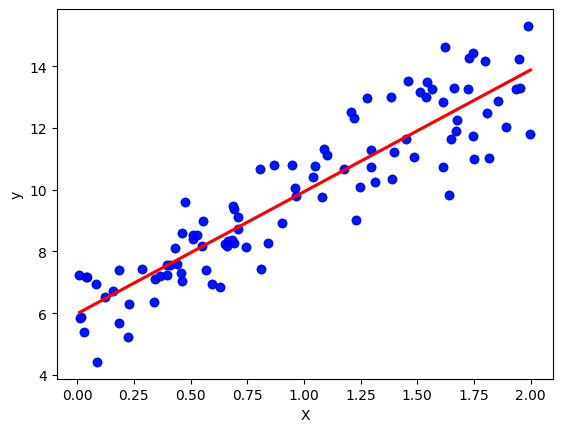

In [50]:
# y = 4X + 6 이 값을 구하기 위해서 이 고생 하는 것

X = 2 * np.random.rand(100,1) # 100행 1열
# print(X)

y = 6 + 4 * X + np.random.randn(100,1)
print(y.shape)
#print(y)

# 추세선이 일자로 나오는 건 좋지 못함
plt.scatter(X, y)

pd_X = pd.DataFrame(X, columns=['X'])
pd_y = pd.DataFrame(y, columns=['y'])
pd_df = pd.concat([pd_X, pd_y], axis=1)

pd_df.head(2)

#sns.regplot(x='X', y='y', data=pd_df, color= 'r', ci=None)
sns.regplot(x='X', y='y', data=pd_df, line_kws={'color':'red'}, scatter_kws={'color':'blue'}, ci=None)

경사 하강법(gradient_descent_steps)_MSE(평균제곱오차계산식)

In [58]:
def get_weight_updates(w, b, X, y, learning_rate=0.01, l1=0.2, l2=0.7): # 하이퍼파라미터
  N = len(y)

  #W, b와 동일한 크기를 가진 0값으로 초기화
  w_update = np.zeros_like(w)
  b_update = np.zeros_like(b)

  # y_pred = wX + b
  y_pred = np.dot(X, w.T)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  # y_pred = wX + b
  y_pred = np.dot(X, w.T) +b
  diff = y - y_pred

  # b_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  b_factors = np.ones((N, 1))

  # w와 b를 업데이트할 w_update와 b를 계산
  w_update = -1 * (2/N) + learning_rate * (np.dot(X.T, diff)) # (1,4) , (4, 1)
  b_update = -1 * (2/N) + learning_rate * (np.dot(b_factors.T, diff))
  return w_update, b_update

In [59]:
# 입력 인자 epochs로 주어진 횟수만큼 반복적으로 w와 b를 업데이트함
def gradient_descent_steps(X, y, epochs=2): # ?

# w와 b를 모두 0으로 초기화
  w = np.zeros((1,1))
  b = np.zeros((1,1))
  for ind in range(epochs):
    w_update, b_update = get_weight_updates(w, b, X, y, learning_rate=0.1)
    w = w - w_update
    b = b - b_update
    return w, b

In [64]:
# 실제 y값과 예측된 y값을 인자로 받아서 MSE(평균제곱오차계산식) 구현
# 이를 이용해 경사 하강법의 예측 오류도 계산

def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred)) / N
  return cost





X = 2 * np.random.rand(100,1) # 100행 1열
# print(X)

y = 6 + 4*X + np.random.randn(100,1) # y = wX + b

print(X.shape)
print(y.shape)

w, b = gradient_descent_steps(X, y, epochs=1000)
print('w:{0:.3f}b:{1:.3f}'.format(w[0,0], b[0,0]))

y_pred = w[0,0] * X + b
print('Gredient Dascent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

(100, 1)
(100, 1)
w:1150.297b:1009.044
Gredient Dascent Total Cost: 5109659.3144


In [40]:
y = np.array([1,3,5,6])
N = len(y)
b_factors = np.ones((N, 1))
b_factors

array([[1.],
       [1.],
       [1.],
       [1.]])

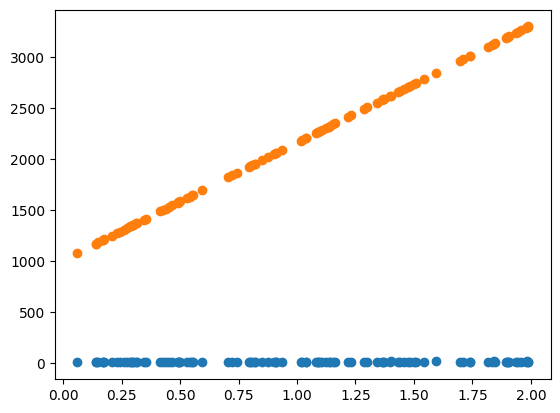

In [66]:
plt.scatter(X,y)
plt.scatter(X, y_pred)